<a href="https://colab.research.google.com/github/Sukriti-m/Audio_Sentiment_Analysis/blob/main/Librosa_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1txr2NMtzstbo8JO_Z9p_7cQeOTwE6HpE
To: /content/audio.mp3
100%|██████████| 26.1k/26.1k [00:00<00:00, 41.4MB/s]


Shape of the feature array: (90, 33)
MFCCs:
[-186.88171387 -203.39578247 -242.63256836 -216.94902039 -208.91917419
 -203.53364563 -209.6658783  -248.99394226 -238.60122681 -151.22015381
 -125.70581818 -137.94790649 -136.83920288 -114.77146149 -165.41160583
 -313.06338501 -304.21029663 -196.47618103 -156.94786072 -157.99052429
 -185.19462585 -250.76141357 -288.28140259 -169.54751587 -118.58203888
 -127.22267914 -164.39456177 -201.9601593  -206.4848938  -194.68612671
 -224.8666687  -263.03448486 -250.7290802  -243.86250305 -257.14123535
 -224.45896912 -192.58758545 -166.12417603 -137.71354675 -143.76544189
 -178.14778137 -182.78253174 -164.53695679 -168.01698303 -173.49185181
 -195.7308197  -252.38117981 -302.51760864 -351.35281372 -344.76513672
 -226.917099   -181.37197876 -199.777771   -188.80981445 -180.94668579
 -200.19006348 -208.28788757 -205.3838501  -214.00315857 -251.93734741
 -306.80944824 -236.7721405  -177.2593689  -153.08171082 -162.11689758
 -159.31362915 -180.96020508 -163

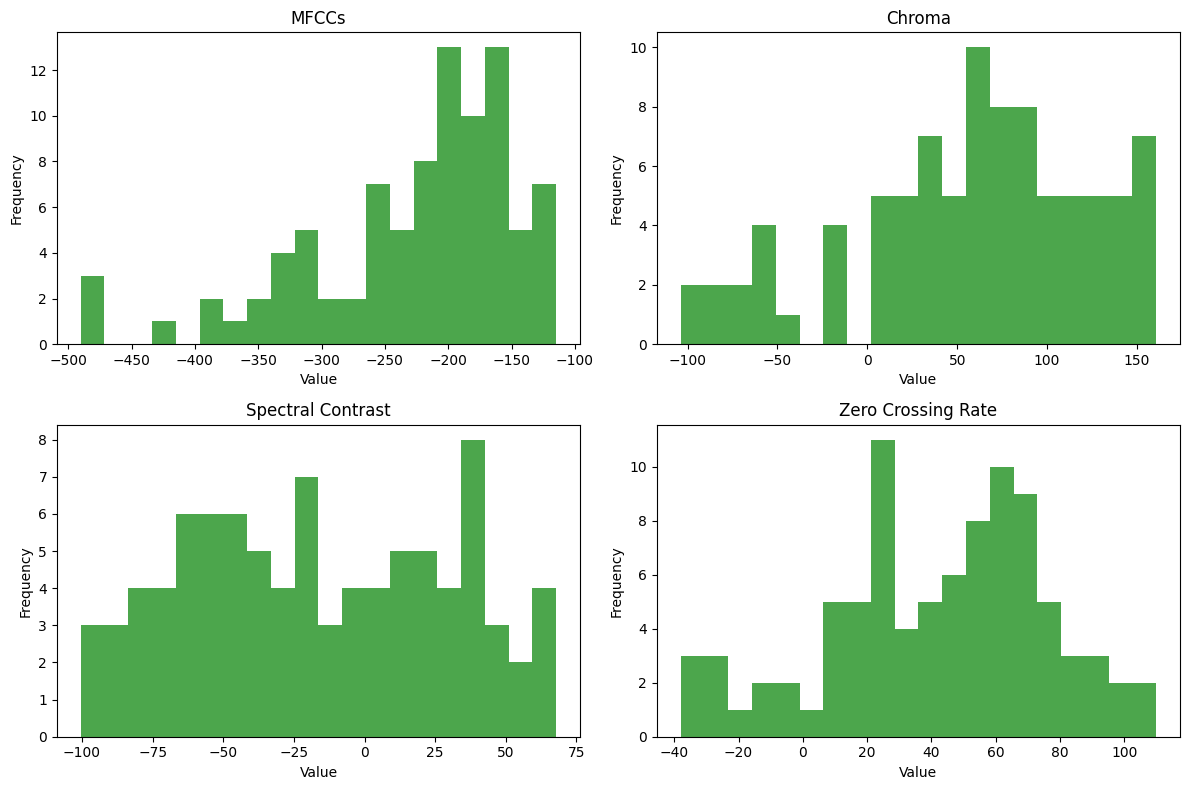

In [7]:
import librosa
import numpy as np
import gdown
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount('/content/drive')

# importing audio file from google drive

audio_drive_link = "https://drive.google.com/uc?id=1txr2NMtzstbo8JO_Z9p_7cQeOTwE6HpE" #Shape of the feature array: (90, 33) 2sec
# audio_drive_link = "https://drive.google.com/uc?id=18ey-wiwDFFUS1Qsyr9DM5xZXen2DvvXr"  # Shape of the feature array: (257, 33) 6sec


# Define the URL to your audio file
local_audio_path = "/content/audio.mp3"  # path and file name can be changed

gdown.download(audio_drive_link, local_audio_path, quiet=False)

# Load the audio file using Librosa
audio, sample_rate = librosa.load(local_audio_path, sr=None)

# Extract MFCCs (Mel-frequency cepstral coefficients)
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

# Extract chroma features
chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)

# Extract spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)

# Extract zero-crossing rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)

# Stack the feature matrices vertically to create a single feature array
features = np.vstack([mfccs, chroma, spectral_contrast, zero_crossing_rate])

# Transpose the feature array so that each row represents a feature, and each column represents a frame in time
features = features.T

# Create histograms for each feature
feature_names = ["MFCCs", "Chroma", "Spectral Contrast", "Zero Crossing Rate"]

# Printing the no. of time frames and features extracted
print("Shape of the feature array:", features.shape)

# Looping to show feature for each time frame
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}:")
    print(features[:, i])  # Access the specific column for the feature
    print()

# size of plot
plt.figure(figsize=(12, 8))

# Ensure that the loop only creates subplots for available features
num_features = min(len(feature_names), features.shape[1])

for i in range(num_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(features[:, i], bins=20, color='g', alpha=0.7)
    plt.title(feature_names[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()